In [278]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [279]:
df = pd.read_csv(r"C:\Users\faruk\OneDrive\Masaüstü\asthma_disease_data.csv")

In [280]:
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid


In [281]:
df.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [ ]:
# Astım olan ve olmayanlar arasında semptomlar farklılık gösteriyor mu, inceleyelim

In [282]:
hasta_df = df[df["Diagnosis"] == 1]

In [283]:
saglikli_df = df[df["Diagnosis"] == 0]

In [284]:
hasta_df["Gender"].value_counts()

Gender
1    62
0    62
Name: count, dtype: int64

In [ ]:
# Gender sütununun hastalığa bir etkisi olmadığını gördüğümüz için çıkarabiliriz

In [285]:
hasta_df["Smoking"].value_counts()

Smoking
0    110
1     14
Name: count, dtype: int64

In [ ]:
# Hastaların çoğu sigara kullanmıyor, modelin sigara kullanmayanları hasta olarak tanımlamaya eğilimli olmaması için smoking'i de çıkarırız.

In [286]:
saglikli_df["Smoking"].value_counts()

Smoking
0    1943
1     325
Name: count, dtype: int64

In [287]:
hasta_df["Wheezing"].value_counts()

Wheezing
1    81
0    43
Name: count, dtype: int64

In [ ]:
# Wheezing astımda belirleyici gözüküyor

In [288]:
hasta_df["Coughing"].value_counts()

Coughing
0    68
1    56
Name: count, dtype: int64

In [255]:
saglikli_df["Coughing"].value_counts()

Coughing
1    1148
0    1120
Name: count, dtype: int64

In [ ]:
# Coughing astımda belirleyici gözükmüyor

In [256]:
hasta_df["ShortnessOfBreath"].value_counts()

ShortnessOfBreath
0    66
1    58
Name: count, dtype: int64

In [ ]:
# Shortnessofbreath astımda belirleyici gözükmüyor

In [257]:
hasta_df["ChestTightness"].value_counts()

ChestTightness
0    72
1    52
Name: count, dtype: int64

In [258]:
saglikli_df["ChestTightness"].value_counts()

ChestTightness
1    1152
0    1116
Name: count, dtype: int64

In [ ]:
# ChestTightness astımda belirleyici gözükmüyor

In [259]:
hasta_df["NighttimeSymptoms"].value_counts()

NighttimeSymptoms
1    69
0    55
Name: count, dtype: int64

In [ ]:
# NighttimeSymptoms astımda belirleyici gözüküyor

In [260]:
hasta_df["ExerciseInduced"].value_counts()

ExerciseInduced
1    89
0    35
Name: count, dtype: int64

In [ ]:
# ExerciseInduced astımda belirleyici gözüküyor

In [261]:
hasta_df["Eczema"].value_counts()

Eczema
0    102
1     22
Name: count, dtype: int64

In [ ]:
# Eczema astımda belirleyici gözüküyor

In [262]:
hasta_df["HayFever"].value_counts()

HayFever
0    97
1    27
Name: count, dtype: int64

In [ ]:
# HayFever astımda belirleyici gözüküyor

In [267]:
hasta_df["PetAllergy"].value_counts()

PetAllergy
0    106
1     18
Name: count, dtype: int64

In [ ]:
# PetAllergy astımda belirleyici gözüküyor

In [266]:
hasta_df["HistoryOfAllergies"].value_counts()

HistoryOfAllergies
0    75
1    49
Name: count, dtype: int64

In [ ]:
# Historyofallergies hastalarda düşük oranda olması, modelin alerji geçmişi olmayanları astım olarak tanımlamasına sebep olabilir, çıkarıyoruz

In [289]:
hasta_df["GastroesophagealReflux"].value_counts()

GastroesophagealReflux
0    100
1     24
Name: count, dtype: int64

In [ ]:
# GastroesophagealReflux astımda belirleyici gözüküyor

In [ ]:
# Kesin olarak etkisi olmayacağını bildiğimiz education level, ethnicity gibi sütunları da çıkarıyoruz.

In [290]:
df2 = df.drop(columns=["PatientID", "DoctorInCharge", "EducationLevel", "Ethnicity", "Gender", "Smoking", "ChestTightness", "ShortnessOfBreath",
                       "Coughing", "HistoryOfAllergies"] )

In [291]:
df2

,Age,BMI,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,15.848744,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,1.369051,4.941206,0,0,1,0
1,26,22.757042,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0,0,0,0,0,2.197767,1.702393,1,1,1,0
2,57,18.395396,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,0,1,0,1.698011,5.022553,1,1,1,0
3,40,38.515278,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0,0,0,1,0,3.032037,2.300159,1,1,0,0
4,61,19.283802,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,1,0,3.470589,3.067944,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,43,29.059613,3.019854,6.119637,8.300960,2.483829,7.314582,3.425445,1,0,0,0,0,3.125249,5.166032,0,0,1,1
2388,18,20.740850,5.805180,4.386992,7.731192,7.733983,2.279073,6.467701,0,0,1,0,0,1.132977,5.509502,0,1,0,1
2389,54,37.079560,4.735169,8.214064,7.483521,2.794847,3.055139,9.484013,0,0,0,1,0,1.685962,3.346877,1,0,1,1
2390,46,23.444712,9.672637,7.362861,6.717272,9.448862,7.712584,5.051405,0,1,0,0,1,3.481549,1.713274,0,1,1,0


In [292]:
df2['pd_exposure'] = df2['PollutionExposure'] + df2['DustExposure']

In [293]:
df3 = df2.drop(columns=["PollutionExposure","DustExposure"])

In [294]:
df3

,Age,BMI,PhysicalActivity,DietQuality,SleepQuality,PollenExposure,PetAllergy,FamilyHistoryAsthma,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,NighttimeSymptoms,ExerciseInduced,Diagnosis,pd_exposure
0,63,15.848744,0.894448,5.488696,8.701003,2.855578,1,1,0,0,0,1.369051,4.941206,0,0,1,0,8.362820
1,26,22.757042,5.897329,6.341014,5.153966,7.457665,0,0,0,0,0,2.197767,1.702393,1,1,1,0,8.554470
2,57,18.395396,6.739367,9.196237,6.840647,1.448189,0,1,0,1,0,1.698011,5.022553,1,1,1,0,6.906392
3,40,38.515278,1.404503,5.826532,4.253036,7.571845,0,0,0,1,0,3.032037,2.300159,1,1,0,0,4.547221
4,61,19.283802,4.604493,3.127048,9.625799,3.049807,0,0,0,1,0,3.470589,3.067944,1,0,1,0,9.241480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,43,29.059613,3.019854,6.119637,8.300960,7.314582,1,0,0,0,0,3.125249,5.166032,0,0,1,1,5.909274
2388,18,20.740850,5.805180,4.386992,7.731192,2.279073,0,0,1,0,0,1.132977,5.509502,0,1,0,1,14.201684
2389,54,37.079560,4.735169,8.214064,7.483521,3.055139,0,0,0,1,0,1.685962,3.346877,1,0,1,1,12.278860
2390,46,23.444712,9.672637,7.362861,6.717272,7.712584,0,1,0,0,1,3.481549,1.713274,0,1,1,0,14.500267


In [ ]:
# Yaş gruplarını sınıflandıralım

In [298]:
def classify_age(age):
    if age <= 18:
        return "0" #Child
    elif age <= 35:
        return "1" #YoungAdult
    elif age <= 55:
        return "2" #Adult
    elif age <= 65:
        return "3" #MiddleAged
    else:
        return "4" #Elder

df3['AgeGroup'] = df3['Age'].apply(classify_age)

In [ ]:
# BMI(BodyMassIndex) sınıflandıralım

In [300]:
def classify_bmi(bmi):
    if bmi < 18.5:
        return "0" #underweight
    elif bmi < 25:
        return "1" #normal
    elif bmi < 30:
        return "2" #overweight
    else:
        return "3" #obese

df3['BMIGroup'] = df3['BMI'].apply(classify_bmi)

In [302]:
df4 = df3.drop(columns= ["Age", "BMI"])

In [303]:
df4

,PhysicalActivity,DietQuality,SleepQuality,PollenExposure,PetAllergy,FamilyHistoryAsthma,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,NighttimeSymptoms,ExerciseInduced,Diagnosis,pd_exposure,AgeGroup,BMIGroup
0,0.894448,5.488696,8.701003,2.855578,1,1,0,0,0,1.369051,4.941206,0,0,1,0,8.362820,3,0
1,5.897329,6.341014,5.153966,7.457665,0,0,0,0,0,2.197767,1.702393,1,1,1,0,8.554470,1,1
2,6.739367,9.196237,6.840647,1.448189,0,1,0,1,0,1.698011,5.022553,1,1,1,0,6.906392,3,0
3,1.404503,5.826532,4.253036,7.571845,0,0,0,1,0,3.032037,2.300159,1,1,0,0,4.547221,2,3
4,4.604493,3.127048,9.625799,3.049807,0,0,0,1,0,3.470589,3.067944,1,0,1,0,9.241480,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3.019854,6.119637,8.300960,7.314582,1,0,0,0,0,3.125249,5.166032,0,0,1,1,5.909274,2,2
2388,5.805180,4.386992,7.731192,2.279073,0,0,1,0,0,1.132977,5.509502,0,1,0,1,14.201684,0,1
2389,4.735169,8.214064,7.483521,3.055139,0,0,0,1,0,1.685962,3.346877,1,0,1,1,12.278860,2,3
2390,9.672637,7.362861,6.717272,7.712584,0,1,0,0,1,3.481549,1.713274,0,1,1,0,14.500267,2,1


In [304]:
X = df4.drop(columns=["Diagnosis"])
y = df4["Diagnosis"] 

In [305]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [25]:
 y.value_counts()

Diagnosis
0    2268
1     124
Name: count, dtype: int64

In [ ]:
# Random Forest + GridSearch+ SMOTE Model

In [308]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

param_grid = {
    'n_estimators': [700, 800, 900],
    'max_depth': [30, 40, 50],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [30, 40, 50], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [700, 800, 900]},
             scoring='f1', verbose=2)

In [309]:
grid_search.best_params_

{'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

In [310]:
best_model = grid_search.best_estimator_

In [312]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       454
           1       0.11      0.16      0.13        25

    accuracy                           0.89       479
   macro avg       0.53      0.55      0.54       479
weighted avg       0.91      0.89      0.90       479



In [ ]:
# Hasta olan kişi verileri az olduğu için skorlar düşük geliyor. Hasta riski olanları yakalayabilmek için eşik değerini değiştireceğiz

In [313]:
importances = best_model.feature_importances_
features = X.columns

feature_df = pd.DataFrame({"Feature": features, "Importance": importances})
feature_df = feature_df.sort_values("Importance", ascending=False)

print(feature_df)


                   Feature  Importance
16                BMIGroup    0.171987
3           PollenExposure    0.084603
14             pd_exposure    0.082858
15                AgeGroup    0.076405
1              DietQuality    0.070985
9         LungFunctionFEV1    0.069095
0         PhysicalActivity    0.068567
10         LungFunctionFVC    0.066524
2             SleepQuality    0.062129
12       NighttimeSymptoms    0.054306
7                 HayFever    0.049571
6                   Eczema    0.036809
5      FamilyHistoryAsthma    0.031865
4               PetAllergy    0.025329
11                Wheezing    0.019307
13         ExerciseInduced    0.015186
8   GastroesophagealReflux    0.014475


In [ ]:
# Hangi eşik değerini kullanmamız gerektiğine karar verelim

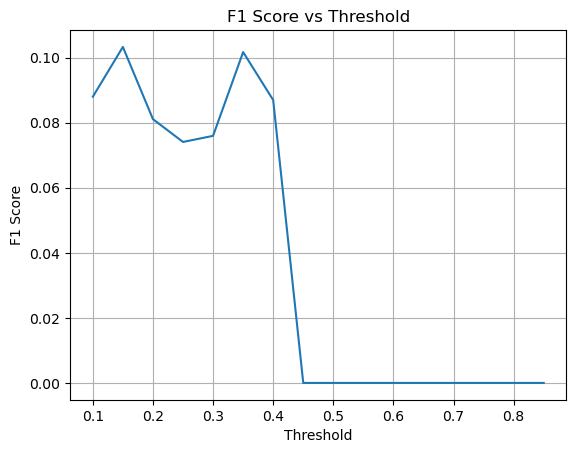

In [317]:
from sklearn.metrics import f1_score

thresholds = np.arange(0.1, 0.9, 0.05)
f1_scores = []

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    f1_scores.append(f1)

plt.plot(thresholds, f1_scores)
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Threshold")
plt.grid(True)
plt.show()

In [320]:
y_probs = best_model.predict_proba(X_test)[:, 1]
threshold = 0.15
y_pred_thresh = (y_probs >= threshold).astype(int)

In [321]:
print(classification_report(y_test, y_pred_thresh))
print(confusion_matrix(y_test, y_pred_thresh))
print("ROC AUC:", roc_auc_score(y_test, y_probs))

              precision    recall  f1-score   support

           0       0.95      0.60      0.74       454
           1       0.06      0.44      0.10        25

    accuracy                           0.59       479
   macro avg       0.50      0.52      0.42       479
weighted avg       0.90      0.59      0.70       479

[[273 181]
 [ 14  11]]
ROC AUC: 0.4788105726872247


In [ ]:
# Diğer skorlar düştü, ama recall skorumuz arttı, eşik değiştirerek astım riski olanları yakalama olasılığımızı arttırabiliyoruz

In [ ]:
# Modeli kaydedelim

In [322]:
import pickle

with open("asthma_model.pkl", "wb") as f:
    pickle.dump(grid_search.best_estimator_, f)


In [323]:
feature_names = X.columns.tolist()

with open("feature_names.pkl", "wb") as f:
    pickle.dump(feature_names, f)

In [324]:
df4.to_csv("asthma_cleaned.csv", index=False)